In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
df10 = pd.read_pickle('../result/naver_POSCO_comments_1005.pkl')

In [3]:
df09 = pd.read_pickle('../result/naver_POSCO_comments.pkl')

In [4]:
body10 = df10['comment']
body09 = df09['comment']

In [9]:
okt = Okt()

In [10]:
okt.morphs("안녕하세요 저는 이민구 입니다")

['안녕하세요', '저', '는', '이민구', '입니다']

In [11]:
okt = Okt()

token09 = body09.apply(lambda x : okt.nouns(str(x)))
token10 = body10.apply(lambda x : okt.nouns(str(x)))

In [12]:
token_lst_09 = []
token_lst_10 = []
for tok in token09:
    temp = []
    for t in tok:
        if len(t) > 1:
            token_lst_09.append(t)
            
for tok in token10:
    temp = []
    for t in tok:
        if len(t) > 1:
            token_lst_10.append(t)

In [13]:
c09 = Counter(token_lst_09)
c10 = Counter(token_lst_10)

In [14]:
posco09 = pd.DataFrame.from_dict(c09, orient='index').reset_index()
posco10 = pd.DataFrame.from_dict(c10, orient='index').reset_index()

In [15]:
posco_merge = pd.merge(left = posco09, right = posco10, how = 'inner', on = 'index')

In [16]:
posco_merge['log_ratio'] = np.log(posco_merge.iloc[:,1] / posco_merge.iloc[:,2])

In [17]:
posco_10 = posco_merge[posco_merge['log_ratio'] < 0]
posco_09 = posco_merge[posco_merge['log_ratio'] > 0]

In [18]:
posco_09_dict = {}
for v in posco_09.values:
    posco_09_dict[v[0]] = v[3]
    
posco_10_dict = {}
for v in posco_10.values:
    posco_10_dict[v[0]] = v[3]    

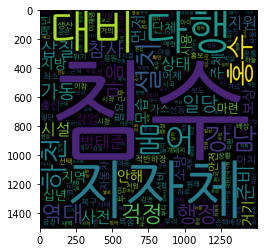

In [19]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', width=500, height=500, scale=3.0, max_font_size=250, background_color= 'black')
gen = wc.generate_from_frequencies(posco_09_dict)

plt.figure()
plt.imshow(gen)

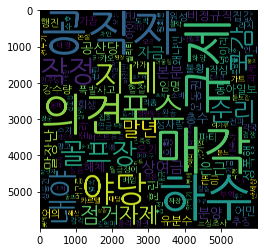

In [143]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', width=2000, height=2000, scale=3.0, max_font_size=250, background_color= 'black')
gen = wc.generate_from_frequencies(posco_10_dict)

plt.figure()
plt.imshow(gen)

In [22]:
df = pd.concat([df09, df10])

In [32]:
df['md'] = df['c_time'].apply(lambda x : x[6:11])

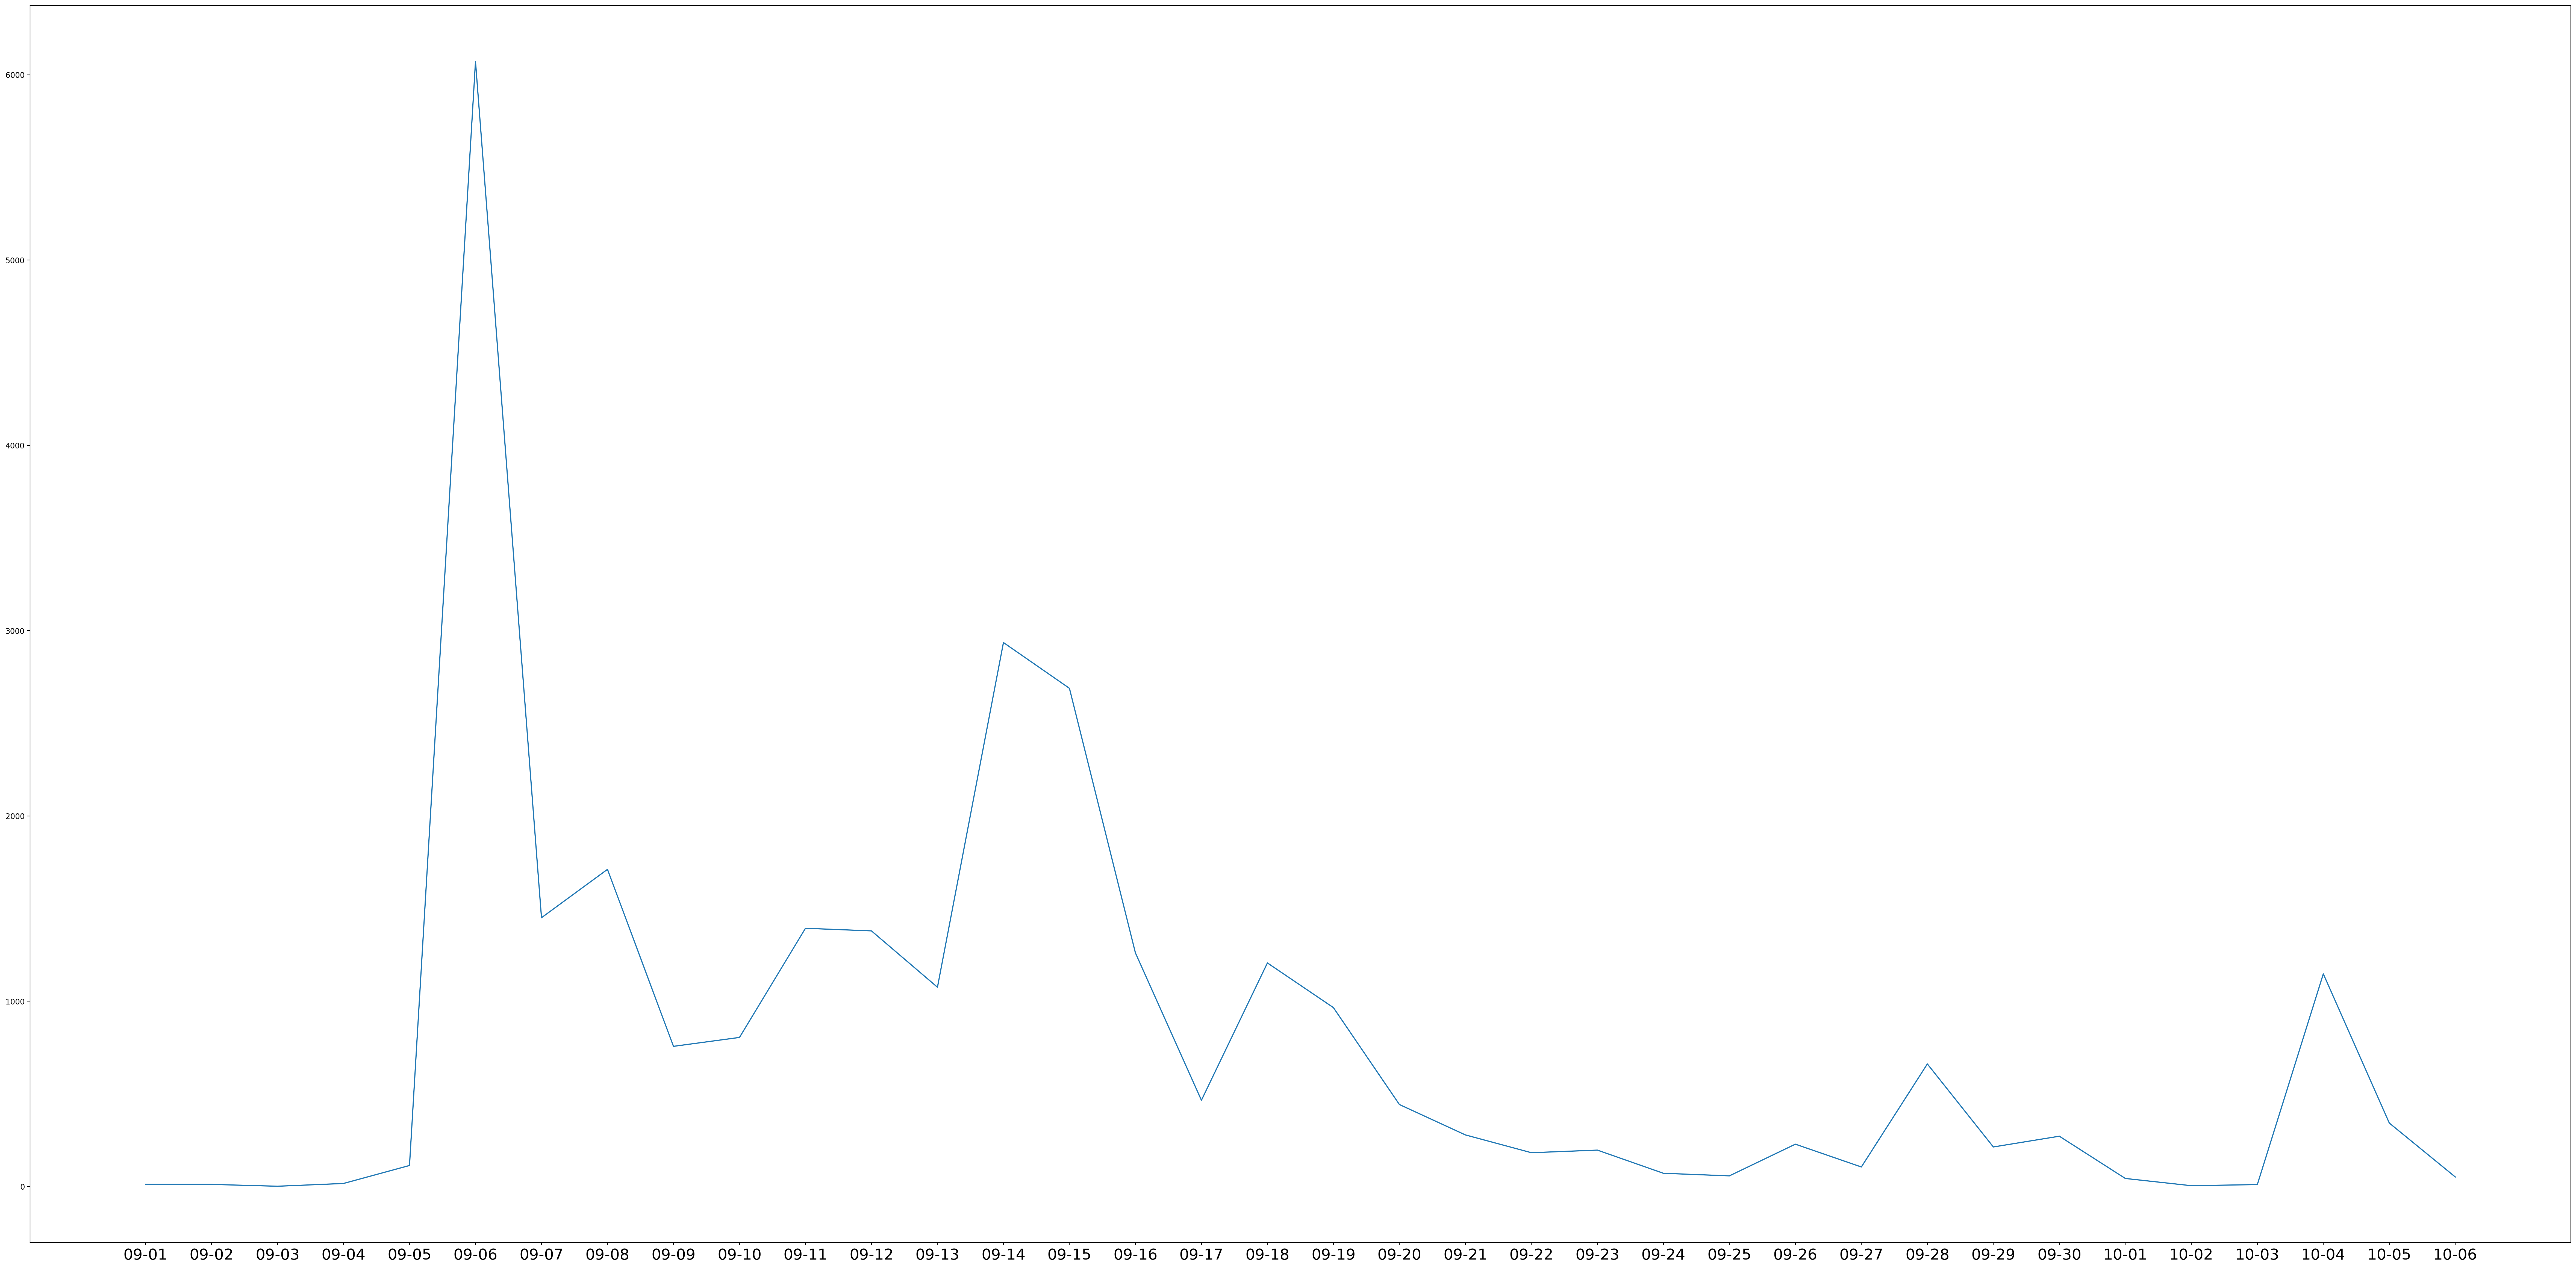

In [36]:
parameters = {'xtick.labelsize': 20,
          'axes.titlesize': 30,
          'figure.figsize' : (60, 30),
          'figure.dpi' : 200
          }
plt.rcParams.update(parameters)

plt.plot(df.groupby('md').size())

In [48]:
df[df['md'] == '10-02']

,comment,reply,author,like,dislike,c_time,cid,pid,sid,time,title,media,md
6,"""최정우 골프처서 태풍대비 제대로 못핸게 밝혀지면 구속수사하라..대통령실 탄원서 보...",0,"""1kIdO""",3,0,"""2022-10-02T08:38:06+0900""",770928039688142884,770928039688142884,102,2022.09.30. 오전 10:09,"[단독]최정우 향한 '포스코 자사주 매입' 의혹, 중앙지검 반부패3부에서 재수사 착수",시사저널,10-02
932,"""국회의 국감이 정치의 희생물이 되어서는 안될것이다.포스코 회장을 국감의 증인으로 ...",0,"""5oZoP""",0,0,"""2022-10-02T22:31:50+0900""",770981752213602844,770981752213602844,100,2022.09.26. 오후 4:35,이강덕 포항시장·최정우 포스코 회장 '힌남노 수해' 책임 묻는다,매일신문,10-02
11808,"""판결이후 시간끌기하는것 포스코가 다 배상해주나? 시간끌기해도 포스코가 보상해줘야 ...",0,"""3a55t""",0,0,"""2022-10-02T16:20:39+0900""",770957839379202354,770957839379202354,102,2022.09.15. 오후 6:28,"""대법원 판결대로 포스코 하청 노동자 정규직 고용하라""",kbc광주방송,10-02
19237,"""인간의 욕심은 끝이 없다~~ 회사가 구조조정 들어가 보아야 후회하니 lmf ...",0,"""4R4lZ""",0,0,"""2022-10-02T09:12:12+0900""",770930236765241413,770930236765241413,101,2022.09.30. 오전 11:08,포항제철소 생산 중단·현대제철 파업...조선용 후판가격 비상등,헤럴드경제,10-02
21568,"""그만해 이러다 우리 다 죽어.. ㅎㅎ""",0,"""3ARGc""",0,0,"""2022-10-02T13:17:50+0900""",770946061605798149,770946061605798149,103,2022.09.26. 오전 6:03,"""경기침체 임박했는데""…산업계 덮친 연쇄 파업리스크",이데일리,10-02
